In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/drive/MyDrive/AI/ML/KNN/Classified_Data.csv', index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
X_train = df.drop('TARGET CLASS', axis=1)

In [6]:
X_train.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_features = scaler.transform(X_train)

In [12]:
scaled_features.shape

(1000, 10)

In [13]:
X_train.shape

(1000, 10)

In [14]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [15]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y_train = df['TARGET CLASS']

In [18]:
y_train

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,y_train,test_size=0.3)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [23]:
y_pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
confusion_matrix(y_test, y_pred)

array([[119,  12],
       [ 16, 153]])

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       131
           1       0.93      0.91      0.92       169

    accuracy                           0.91       300
   macro avg       0.90      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [30]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  error_rate.append(np.mean(y_test!=y_pred))
error_rate

[0.09333333333333334,
 0.11666666666666667,
 0.09333333333333334,
 0.07666666666666666,
 0.07333333333333333,
 0.07666666666666666,
 0.08,
 0.07,
 0.07666666666666666,
 0.08,
 0.08333333333333333,
 0.07666666666666666,
 0.07666666666666666,
 0.08333333333333333,
 0.08333333333333333,
 0.09,
 0.08333333333333333,
 0.09333333333333334,
 0.09,
 0.08666666666666667,
 0.08666666666666667,
 0.09,
 0.09333333333333334,
 0.08666666666666667,
 0.08666666666666667,
 0.08333333333333333,
 0.08666666666666667,
 0.08666666666666667,
 0.08666666666666667,
 0.08,
 0.08,
 0.08,
 0.08,
 0.07666666666666666,
 0.08,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.08]

Text(0, 0.5, 'Error rate')

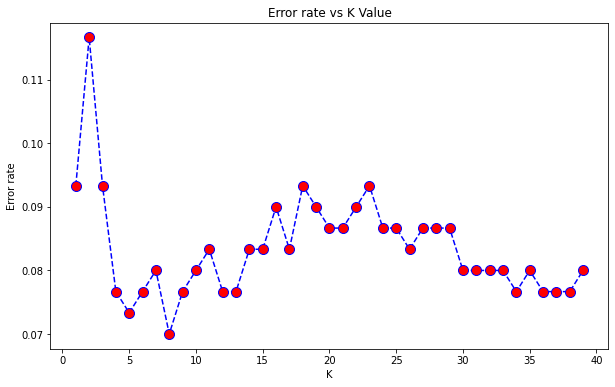

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [38]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


In [39]:
confusion_matrix(y_test,y_pred)

array([[123,   8],
       [ 13, 156]])

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       131
           1       0.95      0.92      0.94       169

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

